Imports

In [6]:
%pip install pandas scikit-learn

import os
import pandas as pd
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 51.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 35.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [17]:
normal_dir = './Dataset/Normal'
fracture_dir = './Dataset/Fracture'
data = []
for img_name in os.listdir(normal_dir):
    if img_name.lower().endswith(('.png')):
        data.append({'image_path': os.path.join(normal_dir, img_name), 'label': 'normal'})

for img_name in os.listdir(fracture_dir):
    if img_name.lower().endswith(('.png')):
        data.append({'image_path': os.path.join(fracture_dir, img_name), 'label': 'fracture'})

df = pd.DataFrame(data)
df.head()
df_shuffled = df.sample(frac=1, random_state=1234).reset_index(drop=True)

EDA

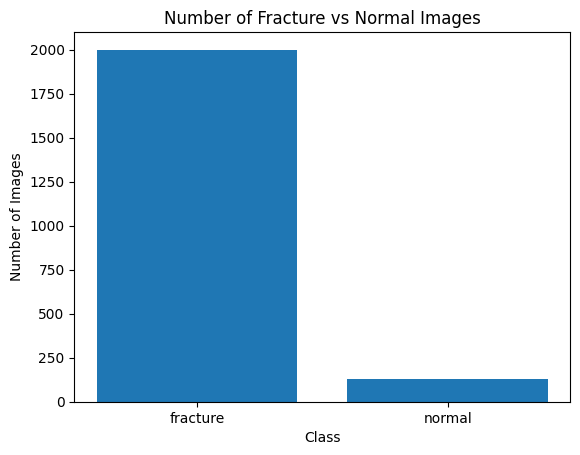

In [ ]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Fracture vs Normal Images')
plt.show()

<Figure size 800x600 with 0 Axes>

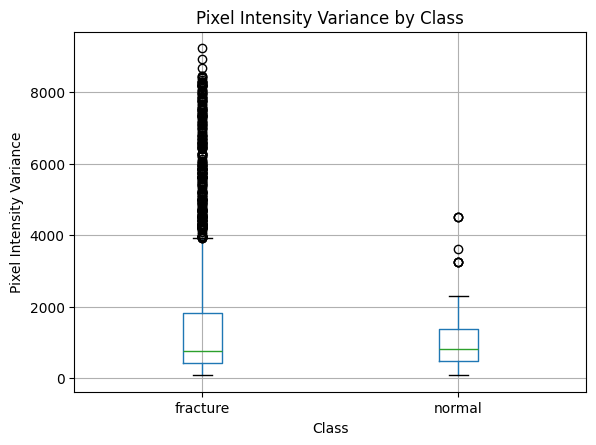

In [19]:
from PIL import Image
import numpy as np

variances = []
labels = []

for item in data:
    img = Image.open(item['image_path']).convert('L')
    pixels = np.array(img)
    variances.append(np.var(pixels))
    labels.append(item['label'])

variance_df = pd.DataFrame({'variance': variances, 'label': labels})

plt.figure(figsize=(8, 6))
variance_df.boxplot(column='variance', by='label')
plt.title('Pixel Intensity Variance by Class')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Pixel Intensity Variance')
plt.show()

In [21]:
image_size = (224, 224)
X_processed = []
y_processed = []

label_map = {'normal': 0, 'fracture': 1}
for row in df_shuffled.itertuples(index=False):
    # resize image
    img = Image.open(row.image_path).convert('L').resize(image_size)
    # normalize to [0, 1]
    arr = np.array(img) / 255.0
    X_processed.append(arr)
    # encode label
    y_processed.append(label_map[row.label])

X_processed = np.array(X_processed)
Y_processed = np.array(y_processed)

In [23]:
X_temp, X_test, Y_temp, Y_test = train_test_split(
    X_processed, Y_processed, test_size=0.2, random_state=1234, stratify=y_processed
)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=1234, stratify=Y_temp
)

print("X_train rows:", len(X_train))
print("X_val rows:", len(X_val))
print("X_test rows:", len(X_test))

print("\nX_train label counts:")
unique, counts = np.unique(Y_train, return_counts=True)
print(dict(zip(unique, counts)))

print("\nX_val label counts:")
unique, counts = np.unique(Y_val, return_counts=True)
print(dict(zip(unique, counts)))

print("\nX_test label counts:")
unique, counts = np.unique(Y_test, return_counts=True)
print(dict(zip(unique, counts)))

X_train rows: 1275
X_val rows: 426
X_test rows: 426

X_train label counts:
{np.int64(0): np.int64(76), np.int64(1): np.int64(1199)}

X_val label counts:
{np.int64(0): np.int64(26), np.int64(1): np.int64(400)}

X_test label counts:
{np.int64(0): np.int64(25), np.int64(1): np.int64(401)}
